# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [15]:
from keras.datasets import mnist
import numpy as np

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

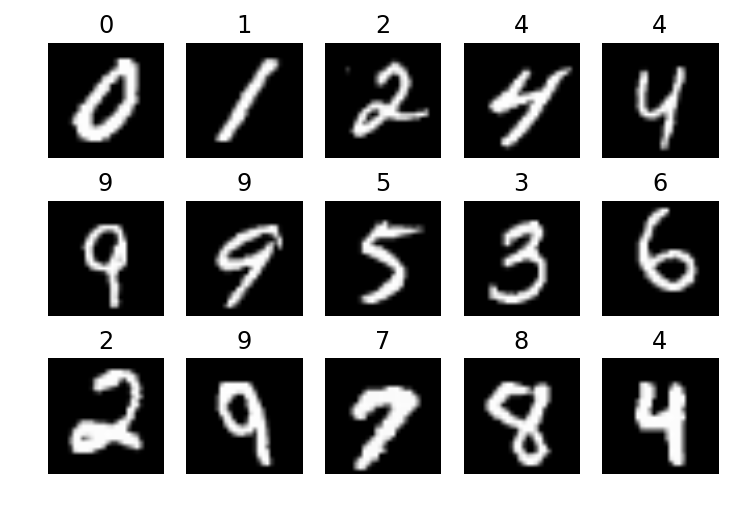

In [3]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。


In [4]:
import numpy as np
from sklearn import preprocessing

n_class, n_len, width, height = 11, 5, 28, 28
lb = preprocessing.LabelBinarizer()
lb.fit(np.array([0,1,2,3,4,5,6,7,8,9,10]))


def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
#     X_gen = X.reshape(X.shape[0], height, width*n_len,1)
#     print X_gen[0][0]
########## Try 1 ##########
#     for img in range(n_len):
#         new_image = None
#         new_labels = [] 
#         for i in range(n_len):
#             index = np.random.randint(0, y.shape[0]) 
#             if new_image is None:
#                 new_image = X[index].copy()
#             else:                
#                 new_image = np.append(new_image, X[index], 1) 
#             new_labels.append(y[index])
#         if img == 0:
#             new_set = new_image
#         else:            
#             new_set = np.dstack((new_set,new_image))
#     X_gen = X_gen.reshape((new_set[0],height,width*n_len,1))  
#     print new_set.shape
#     X_gen = np.expand_dims(new_set,axis=3)
#     print X_gen[0][:,:,0]


    # Create one-hot encoder for digit label: y_gen
#     lb = preprocessing.LabelBinarizer()
#     lb.fit(y)
#     y_onehot = lb.transform(y)
#     print y_onehot.shape
########## Try 2 ##########
#     X = X.reshape(X_len,height,width,1)
#     for i in range(4):
#         index = np.random.permutation(X_len)
#         X_new = X[index,:]
#         if i < 1:
#             X_gen = X_new
#         else:
#             X_gen = np.dstack((X_gen,X_new))
#         y_gen[i][np.arange(X_len), y] = 1
#         y_gen[i] = y_gen[i][index,:]

########### Try 2 Update ##########
    i = 0
    w = 0
    while i < X_len:
        # X_new is an array with shape (28,140,1); 
        # y_new is a list with length 5;
        X_new = np.hstack([X[w],X[w+1],X[w+2],X[w+3],X[w+4]]).reshape(height, width*n_len, 1)
        y_new = [y[w],y[w+1],y[w+2],y[w+3],y[w+4]]
        empty_size = random.randint(0,4)
        e = 0
        while e < empty_size:
            empty_loc = random.randint(0,4)
            X_new[:,28*empty_loc:28*empty_loc+28] = 0
            y_new[empty_loc] = 10
            e += 1
        X_gen[i, :, :] = X_new       
        one_hot_y = lb.transform(y_new)
        for k in range(5):
            y_gen[k][i,:] = one_hot_y[k]
        w = random.randint(0,X_len-6)
        i += 1
        
    return X_gen, y_gen

# X_train, y_train = generate_dataset(X_raw, y_raw)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)
print X_test[:,:,112:140].shape

(10000, 28, 28, 1)


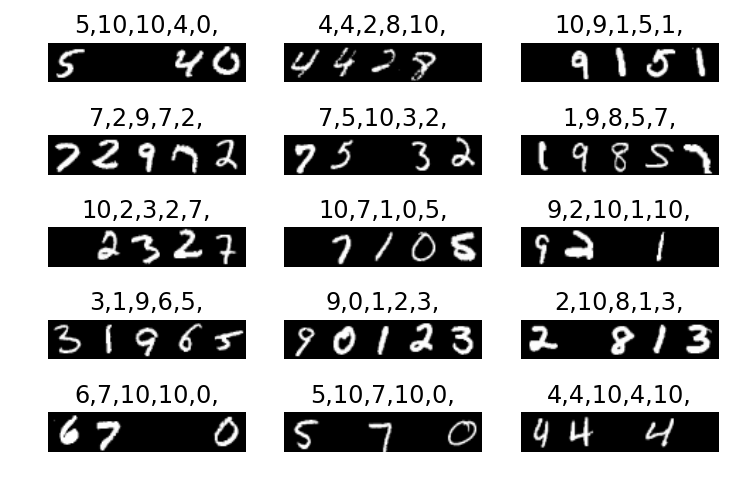

In [5]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

# 问题 1
_你是如何合成数据集的？_

**回答：**  
> 根据要合成数据集的大小i，进行i次循环，在每一个循环内:  
* 对于图片，通过hstack的方法将5张28＊28的数组堆叠成28＊140的框架；  
* 对于标签，则是先构成长度为5的list。然后从0到4随机选择出现空白的个数，之后再随机选择空白出现的位置。  
* 对于图片，出现空白的位置则是让该位置的28＊28的数组全为零；对于标签，则是让list中该位置的数字变为10。  

>然后将这一次循环要合成的图片更新，对标签进行one-hot处理，分为11个类，10个数字加上一个空白（设置为10），同时对标签的五个数进行更新。之后再随机选择w（即五个28*28的随机数组堆叠），继续下一次循环，直到合成所需要的数据集大小。


### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 
>我用了keras的泛型模型来搭建多输出模型，并且这个模型是基于卷积神经网络的。  
因为数字序列限制的长度是五，而每个数字分11个类，一个需要五个分类器。所以在输出的时候要构建一个张量列表，每个分类器都全连接并用softmax为激活函数，然后每个分类器识别11个类里对应的数字。

>对于每个分类器在输出层之前的处理结果都是一样的，所以我尝试用了卷积神经网络中的权值共享，在局部连接中隐藏层的每个神经元连接的是一个3＊3的局部图像，因此有3＊3个权值参数。一共有32个filter，所以这32个特征图共享3＊3个权值参数。  
之后连接的是池化层，每个图的每个单元与前个卷积层中的一个2＊2邻域相连。  
接下的一个卷积层是32个卷积核，有32个特征图，做同样的处理连接下一个池化层。  
第三个卷积层是64个卷积核，有64个特征图，每个特征图的每个单元与前一个池化层的全部32个2＊2邻域相连。  
然后为防止过拟合连接Dropout层，之后通过Flatten层将卷积层与全连接层相连接的过渡。  
全连接层的输出维度为128，用relu作为激活函数。  
最后就是每个分类器对应的11个分类层。

In [6]:
from keras.models import Model
from keras.layers import *

# TODO: 构建你的模型
########## 构建模型 ##########
num_classes = 11
img_rows, img_cols = 28, 140

digit_input = Input(shape=(img_rows, img_cols, 1))
x = Conv2D(32, 3, 3, activation='relu')(digit_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, 3, 3, activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, 3, 3, activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)
out = Flatten()(x)

out = Dense(128, activation='relu')(out)
out = Dropout(0.5)(out)
y1 = Dense(num_classes, activation='softmax')(out)
y2 = Dense(num_classes, activation='softmax')(out)
y3 = Dense(num_classes, activation='softmax')(out)
y4 = Dense(num_classes, activation='softmax')(out)
y5 = Dense(num_classes, activation='softmax')(out)

model = Model(input=digit_input, output=[y1, y2, y3, y4, y5])


### 可视化你的网络模型

参考链接：[visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是 PNG 格式，也可以是 SVG 格式。

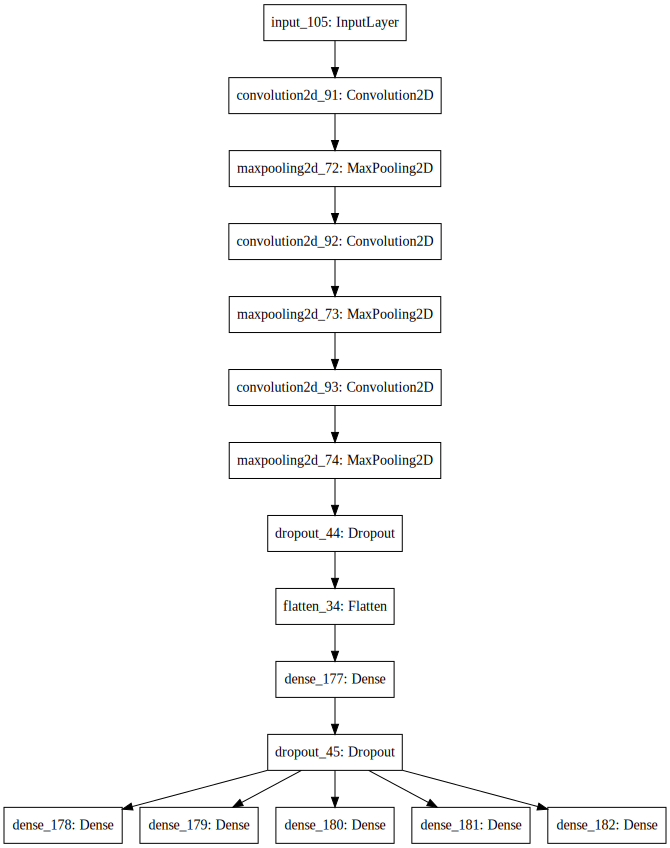

In [113]:
from keras.utils.visualize_util import plot, model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**
>最终模型是一个有五个分类器的泛型模型，分别由：  
* 三个卷积层、三个池化层、两个Dropout层、一个Flatten层、六个全连接层。
* 前两个卷积层由3*3的kernel构成了32个filters；第三个卷积层则是由3＊3的kernel构成了64个filters。这三个卷积层都用了relu激活函数。     
* 三个池化层的大小都是2＊2。  
* 五个分类器之前的全连接层大小是128；最后每个分类器对应的全连接层大小为11，并调用了softmax激活函数。  
* 全连接层使用relu作为激活函数连接Dropout层。 
* 连接方式为[INPUT - (CONV - RELU - POOL)＊3 - FC - FC]。


### 练习：训练你的网络模型

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [114]:
# TODO: 训练你的模型
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

train_labels = [y_train[0],y_train[1],y_train[2],y_train[3],y_train[4]]
test_labels = [y_test[0],y_test[1],y_test[2],y_test[3],y_test[4]]

model.fit(X_train, train_labels, batch_size=128, nb_epoch=5, 
          verbose=1, validation_split=0.2, validation_data=(X_test, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 539s - loss: 10.7422 - dense_178_loss: 2.1397 - dense_179_loss: 2.2006 - dense_180_loss: 2.0852 - dense_181_loss: 2.1148 - dense_182_loss: 2.2019 - dense_178_acc: 0.3617 - dense_179_acc: 0.3509 - dense_180_acc: 0.3642 - dense_181_acc: 0.3635 - dense_182_acc: 0.3411 - val_loss: 6.6606 - val_dense_178_loss: 1.3333 - val_dense_179_loss: 1.2716 - val_dense_180_loss: 1.3016 - val_dense_181_loss: 1.2804 - val_dense_182_loss: 1.4737 - val_dense_178_acc: 0.5838 - val_dense_179_acc: 0.6177 - val_dense_180_acc: 0.6038 - val_dense_181_acc: 0.6060 - val_dense_182_acc: 0.5018
Epoch 2/5
60000/60000 [==============================] - 495s - loss: 5.9488 - dense_178_loss: 1.1835 - dense_179_loss: 1.1239 - dense_180_loss: 1.1196 - dense_181_loss: 1.1153 - dense_182_loss: 1.4066 - dense_178_acc: 0.6157 - dense_179_acc: 0.6352 - dense_180_acc: 0.6340 - dense_181_acc: 0.6360 - dense_182_acc: 0.5431 -

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [153]:
def evaluate(model):
    right = 0
    error = 0
    # TODO: 按照错一个就算错的规则计算准确率
    pred_array = np.array(model.predict(X_test, batch_size=32, verbose=0))
    pred = np.argmax(pred_array, 2).T
    test = np.array(y_test)
    
    for i in range(X_test.shape[0]):
        if pred[i].all() == lb.inverse_transform(test[:,i,:]).all():
            right += 1
        else:
            error += 1
    return float(right)/(right+error)

evaluate(model)

0.9853

### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**
>我的模型的准确率是98.53%，我觉得我的模型足以解决问题。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

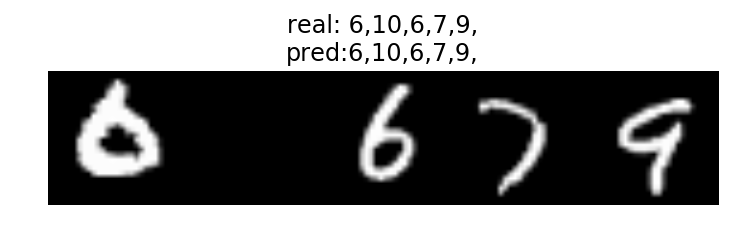

In [157]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要将模型的权值和结构保存，以便下次调用。

In [14]:
model.save_weights('model.h5')
with open('model.json', 'w') as f:
    f.write(model.to_json())